## Strategy Idea 1 : "BSP Hedging" : WIP

__Section 0: Setup__ Importing packages/reading in data etc.

__Section 1 : Idea__ 

- __1.1__ Strategy idea

- __1.2__ Origin of idea. Context/Reasoning for strategy to work e.g. use in financial markets?

__Section 2 : Exploration__

- __2.1__ Exploratory Data Analysis. e.g plots of price/volumes that could show strategy working, how much potential.

- __2.2__ Define some 'strategy metrics'. Metrics that can can you use to gauge if this strategy will work i.e no.price points above a certain threshold that is profitable. Metrics could show how often there is an opportunity to make a trade and how much 'value' is in an opportunity e.g. how much is there a price swing?


__Section 3 : Strategy testing__

- __3.1__ Testing strategy on previous data. 

- __3.2__ State any assumptions made by testing.

- __3.3__ Model refinements. How could strategy be optimised? Careful : is this backfitting/overfitting - what measures taken to negate this e.g. bootstrapping?

- __3.4__ Assessing strategy. P/L on data sample? ROI? variance in results? longest losing run?

__Section 4 : Practical requirements__

- __4.1__ Identify if this edge is ‘realisable’? What methods will you apply to extract this value? e.g. applying a hedge function


- __4.2__ Is it possible to quantify the potential profit from the strategy? Consideration : How long will it take to obtain this? How 'risky' is it? e.g. if something did go wrong, how much do we lose? 

- __4.3__ Strategy limitations. The factors that could prevent strategy working e.g. practical considerations e.g. reacting quick enough to market updates, volume behind a price, size of bankroll needed


__Section 5: Potential limitations__

- __5.1__ What is our 'competition' - if not quantifiable, do we suspect people are doing the same thing? 

- __5.2__ So what's our edge? Identify ways of finding this edge in future? e.g what features are there? Are they predictive? Is there a certain 'market/runner' profile?





### Section 0 : Setup

In [87]:
# importing packages
from pathlib import Path, PurePath 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import utils

pd.set_option('display.max_columns', None)

In [88]:
# reading in data
project_dir = Path.cwd().parents[2]
data_dir = project_dir / 'data' / 'processed' / 'api' / 'advanced' / 'adv_data.csv'
df = pd.read_csv(data_dir, index_col = 0)
print(df.shape)
df.head()

(13073, 307)


,SelectionId,MarketId,Venue,Distance,RaceType,BSP,NoRunners,BS:T-60,BS:T-59,BS:T-58,BS:T-57,BS:T-56,BS:T-55,BS:T-54,BS:T-53,BS:T-52,BS:T-51,BS:T-50,BS:T-49,BS:T-48,BS:T-47,BS:T-46,BS:T-45,BS:T-44,BS:T-43,BS:T-42,BS:T-41,BS:T-40,BS:T-39,BS:T-38,BS:T-37,BS:T-36,BS:T-35,BS:T-34,BS:T-33,BS:T-32,BS:T-31,BS:T-30,BS:T-29,BS:T-28,BS:T-27,BS:T-26,BS:T-25,BS:T-24,BS:T-23,BS:T-22,BS:T-21,BS:T-20,BS:T-19,BS:T-18,BS:T-17,BS:T-16,BS:T-15,BS:T-14,BS:T-13,BS:T-12,BS:T-11,BS:T-10,BS:T-9,BS:T-8,BS:T-7,BS:T-6,BS:T-5,BS:T-4,BS:T-3,BS:T-2,BS:T-1,BS:T+0,BS:T+1,BS:T+2,BS:T+3,BS:T+4,BS:T+5,BS:T+6,BS:T+7,BS:T+8,BS:T+9,BS:T+10,BS:T+11,BS:T+12,BS:T+13,BS:T+14,BP:T-60,BP:T-59,BP:T-58,BP:T-57,BP:T-56,BP:T-55,BP:T-54,BP:T-53,BP:T-52,BP:T-51,BP:T-50,BP:T-49,BP:T-48,BP:T-47,BP:T-46,BP:T-45,BP:T-44,BP:T-43,BP:T-42,BP:T-41,BP:T-40,BP:T-39,BP:T-38,BP:T-37,BP:T-36,BP:T-35,BP:T-34,BP:T-33,BP:T-32,BP:T-31,BP:T-30,BP:T-29,BP:T-28,BP:T-27,BP:T-26,BP:T-25,BP:T-24,BP:T-23,BP:T-22,BP:T-21,BP:T-20,BP:T-19,BP:T-18,BP:T-17,BP:T-16,BP:T-15,BP:T-14,BP:T-13,BP:T-12,BP:T-11,BP:T-10,BP:T-9,BP:T-8,BP:T-7,BP:T-6,BP:T-5,BP:T-4,BP:T-3,BP:T-2,BP:T-1,BP:T+0,BP:T+1,BP:T+2,BP:T+3,BP:T+4,BP:T+5,BP:T+6,BP:T+7,BP:T+8,BP:T+9,BP:T+10,BP:T+11,BP:T+12,BP:T+13,BP:T+14,LP:T-60,LP:T-59,LP:T-58,LP:T-57,LP:T-56,LP:T-55,LP:T-54,LP:T-53,LP:T-52,LP:T-51,LP:T-50,LP:T-49,LP:T-48,LP:T-47,LP:T-46,LP:T-45,LP:T-44,LP:T-43,LP:T-42,LP:T-41,LP:T-40,LP:T-39,LP:T-38,LP:T-37,LP:T-36,LP:T-35,LP:T-34,LP:T-33,LP:T-32,LP:T-31,LP:T-30,LP:T-29,LP:T-28,LP:T-27,LP:T-26,LP:T-25,LP:T-24,LP:T-23,LP:T-22,LP:T-21,LP:T-20,LP:T-19,LP:T-18,LP:T-17,LP:T-16,LP:T-15,LP:T-14,LP:T-13,LP:T-12,LP:T-11,LP:T-10,LP:T-9,LP:T-8,LP:T-7,LP:T-6,LP:T-5,LP:T-4,LP:T-3,LP:T-2,LP:T-1,LP:T+0,LP:T+1,LP:T+2,LP:T+3,LP:T+4,LP:T+5,LP:T+6,LP:T+7,LP:T+8,LP:T+9,LP:T+10,LP:T+11,LP:T+12,LP:T+13,LP:T+14,LS:T-60,LS:T-59,LS:T-58,LS:T-57,LS:T-56,LS:T-55,LS:T-54,LS:T-53,LS:T-52,LS:T-51,LS:T-50,LS:T-49,LS:T-48,LS:T-47,LS:T-46,LS:T-45,LS:T-44,LS:T-43,LS:T-42,LS:T-41,LS:T-40,LS:T-39,LS:T-38,LS:T-37,LS:T-36,LS:T-35,LS:T-34,LS:T-33,LS:T-32,LS:T-31,LS:T-30,LS:T-29,LS:T-28,LS:T-27,LS:T-26,LS:T-25,LS:T-24,LS:T-23,LS:T-22,LS:T-21,LS:T-20,LS:T-19,LS:T-18,LS:T-17,LS:T-16,LS:T-15,LS:T-14,LS:T-13,LS:T-12,LS:T-11,LS:T-10,LS:T-9,LS:T-8,LS:T-7,LS:T-6,LS:T-5,LS:T-4,LS:T-3,LS:T-2,LS:T-1,LS:T+0,LS:T+1,LS:T+2,LS:T+3,LS:T+4,LS:T+5,LS:T+6,LS:T+7,LS:T+8,LS:T+9,LS:T+10,LS:T+11,LS:T+12,LS:T+13,LS:T+14
0,11986132,1.169028,Huntingdon,20.0,Chase,8.33,9,16.43,24.51,26.57,29.46,9.45,7.30,7.72,18.00,25.65,26.59,30.87,32.91,27.91,20.24,33.57,29.05,20.57,24.74,29.07,39.42,49.54,72.71,31.60,18.40,23.78,28.21,25.74,18.94,24.43,27.93,44.97,42.95,47.41,38.62,33.02,32.00,98.33,121.35,142.04,151.96,168.18,227.47,209.83,210.13,369.11,303.86,255.28,287.92,297.18,249.41,167.35,215.79,166.06,158.57,89.77,100.91,106.36,142.37,217.57,145.20,54.24,23.18,52.54,43.24,42.45,34.70,10.07,25.08,12.26,22.24,18.05,15.39,8.37,24.27,162.12,8.40,8.40,8.51,8.60,8.51,8.40,8.41,8.68,8.91,9.00,9.20,9.20,9.32,9.40,9.40,9.4,9.40,9.40,9.40,9.40,9.40,9.38,9.19,9.04,9.00,8.90,9.00,8.91,8.31,8.30,7.99,7.80,7.80,7.80,7.80,7.80,7.8,7.80,7.63,7.60,7.60,7.60,7.60,7.62,7.80,7.80,7.80,7.80,7.80,7.84,8.32,7.88,7.77,7.85,7.98,8.71,8.88,8.96,8.67,8.00,8.34,10.07,10.11,8.20,9.07,9.06,11.08,12.29,12.74,10.36,11.86,31.44,194.53,894.12,1000.00,8.60,8.60,8.71,8.80,8.78,8.80,8.80,8.92,9.13,9.2,9.4,9.40,9.52,9.60,9.60,9.60,9.60,9.60,9.60,9.60,9.60,9.58,9.40,9.26,9.20,9.20,9.20,9.11,8.58,8.63,8.22,8.00,8.00,8.00,8.00,8.00,8.00,8.00,7.83,7.80,7.80,7.80,7.80,7.82,8.00,8.00,8.00,8.00,8.00,8.04,8.52,8.09,7.97,8.05,8.20,8.95,9.10,9.17,8.87,8.21,8.76,11.05,10.76,8.56,9.57,9.67,13.52,13.76,15.06,12.10,13.74,80.65,352.06,690.00,690.00,10.07,10.49,19.65,22.05,19.82,22.67,22.44,25.21,13.19,10.40,10.55,9.73,96.77,148.47,147.31,144.77,136.59,127.07,114.12,114.12,113.39,103.26,34.31,17.70,18.54,22.90,17.14,55.64,17.22,32.51,791.66,1097.96,1136.01,1122.04,1109.75,1098.61,1182.53,1186.33,380.79,199.39,208.45,197.16,164.17,212.19,1142.59,1138.46,1136.51,1130.1

In [89]:
# defining variables
back_prices = [col for col in df.columns if 'BP' in col]
back_sizes = [col for col in df.columns if 'BS' in col]
lay_prices = [col for col in df.columns if 'LP' in col]
lay_sizes = [col for col in df.columns if 'LS' in col]

runner_info = ['SelectionId', 'MarketId', 'Venue', 'Distance', 'RaceType', 'BSP', 'NoRunners']

In [90]:
def plot_df():
    plot_df = df[df['BSP'].notna()].sample(1).copy() # 60 NA BSP's

    bp_df = plot_df[['SelectionId'] + back_prices].copy()
    new_cols = bp_df.columns.str.replace("[BP:T]", "").str.replace("[+]", "")
    bp_df.rename(columns = dict(zip(bp_df.columns, new_cols)), inplace = True)
    bp_df = pd.melt(bp_df, id_vars = ['SelectionId'])
    bp_df['variable'] = bp_df['variable'].astype(int)

    lp_df = plot_df[['SelectionId'] + lay_prices].copy()
    new_cols = lp_df.columns.str.replace("[LP:T]", "").str.replace("[+]", "")
    lp_df.rename(columns = dict(zip(lp_df.columns, new_cols)), inplace = True)
    lp_df = pd.melt(lp_df, id_vars = ['SelectionId'])
    lp_df['variable'] = lp_df['variable'].astype(int)

    bsp_df = plot_df[['BSP']].copy()
    bsp_df['min_bp'] = bsp_df['BSP'].apply(lambda x: round(utils.back_hedge_threshold(x, 0.05), 2))
    bsp_df['max_lp'] = bsp_df['BSP'].apply(lambda x: round(utils.lay_hedge_threshold(x, 0.05), 2))    
    
    return bp_df, lp_df, bsp_df

### Section 1 : Idea

__1.1 Idea__

There is a large amount of price variation during __inplay__ markets in addition to high volumes of trading with £100,000-£200,000 (~20% of total matched per race) occurring during a race. I believe there is a profitable strategy to be had in back/laying a horse 'simultaneously at BSP and looking the 'hedge' this during a race. 

For example, backing a horse at BSP laying it higher inplay as well as laying at BSP and backing whilst inplay. Both yielding profitable hedge bets. Due to the amount of variation and the frequency at which this occurs (seems to be for large & of runners) with inplay prices, I suspect that there there is a large amount of potential to exploit this.

__1.2  Reasoning__

Why is there an edge here?
- Variation caused by a events that can happen within horse racing - anything can happen -> variations. e.g. a leader out in front all the way who then falls or a really close race where anyone can win it -> many price swings!
- Due to this in race 'unpredicatability' I believe there is a large amount of uncertainty of what the actua; price point is during the race, whilst the market price's the end result of the race as if it is 'easily estimated' but the minimum inplay overround ' says otherwise, meaning the inplay markets are very ineeficient. 

_Minimum Inplay overround : Taking the minimum price for every runner during a race and calculating the overround. There is a very high amount of overround 2X/3X that of a 'pre-race' market. Revealing that many runners in play are clearly priced inefficiently i.e. price != probability of winning the race._ High inplay overround/inefficiency has been identified in the `strategy_tests_old` notebooks.

### Section 2 : Exploration

__2.1__ Plots

To explore this phenomena (of price variation in comparison to BSP) plots of the back price and lay price throughout the time of race are shown below: 

__Plot of Back/Lay Price by Runner__

Taking a random runner from the sample and plotting their Back and Lay price over time. 

We are interested in how many time a horse's price goes above/below the red dotted line after Time == 0, when the race starts. The red dotted line displays the Betfair Starting Price which the back & lay price you can guarantee yourself before the start of the race.

Note : every time you run the cell a different runner will be chosen to plot - spam CTRL + ENTER

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 <a list of 9 Text major ticklabel objects>)

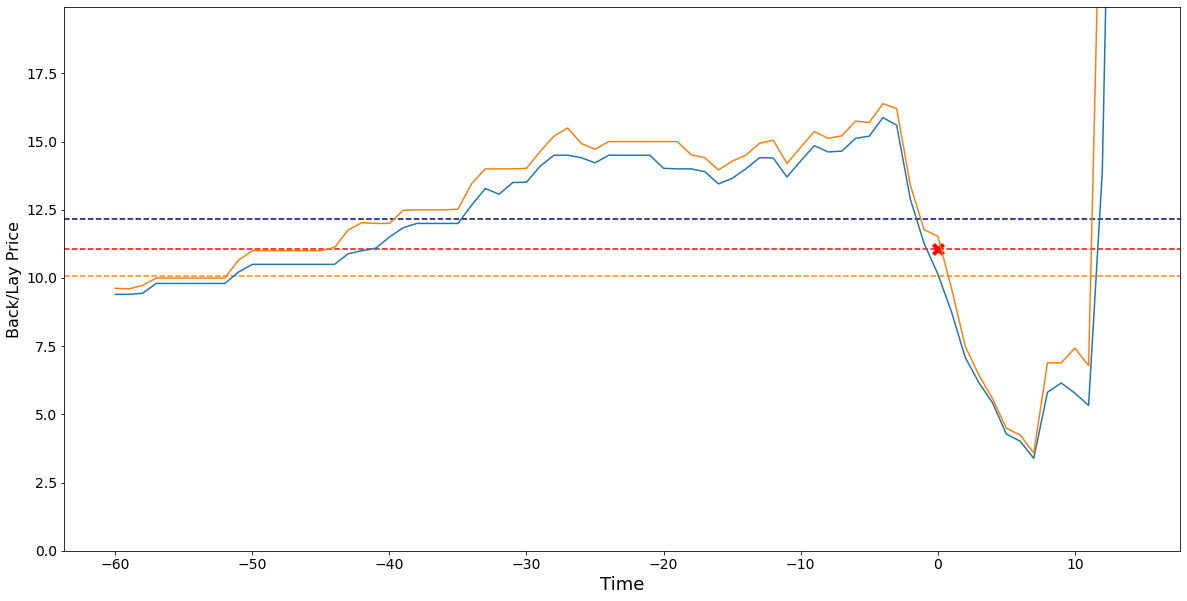

In [160]:
bp_df, lp_df, bsp_df = plot_df()

# set plotting parameters
plt.figure(figsize=(20,10))
plt.ylim(0, bsp_df['BSP'].item() * 1.8) # limit y axis

# plotting
sns.scatterplot(0, y = bsp_df['BSP'], marker = 'X', s=200, color = 'r')
plt.axhline(y=bsp_df['BSP'].item(), color='r', linestyle='--')
plt.axhline(y=bsp_df['max_lp'].item(), color='darkorange', linestyle='--')
plt.axhline(y=bsp_df['min_bp'].item(), color='darkblue', linestyle='--')

sns.lineplot(x = 'variable', y = 'value', data = bp_df, ci = None)

sns.lineplot(x = 'variable', y = 'value', data = lp_df, ci = None)

# plot formatting
plt.xlabel('Time', fontsize=18)
plt.ylabel('Back/Lay Price', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

As shown above, there are many example whereby the inplay back/lay price fluctuates below/above the guaranteed BSP - this is good news! 

However, what we are most interest in is how to extract most value from this insight by quanitfying how often this occurs - we need some metrics...
___

__2.2 Metrics__

To determine the potential success of this strategy we need to consider three things:
- (1) The probability of the inplay price reaching a profitable level
- (2) The probability of your inplay bet being matched
- (3) The profit that can be made if prices reaches/exceeds this level
- (4) The loss incurred if the price doesn't reach this level and the trade isn't match
    
The strategy would look something like this:
- We back and lay at BSP 
- We place seperate lay and back orders into the market as the race starts
- The orders are placed at the minimum price differencee from the BSP needed to make a profitable hedge
    
(We are effectively testing out two strategies at once, Back to then Lay and Lay to then Back)

___

To get an initial idea of the potential success of this strategy we'll initially just investigate the following:


__Metric 1__ : How often does an inplay back price exceed the BSP per runner?

__Metric 2__ : How often does an inplay lay price go below the BSP per runner?

This is good but what we're really interest in is the amount by which these prices increase/decrease by and if these differences are profitable enough...

__Metric 3__ : If inplay BP goes above bsp, how often does it go higher than min hedge price?

__Metric 4__ : If inplay LP went below bsp, how often does it go lower than max hedge price?

Further to this, how often do these events hapen together for a single runner?

__Metric 5__ : How often so __Metric 3__ & __Metric 4__ occur together?
  
  
(Worth adding a metric to look into how far above/below min hedge price?)

In [92]:
test_df = df[back_prices + lay_prices + ['BSP']].copy()

bp_start = test_df.columns.get_loc("BP:T+0")
bp_end = test_df.columns.get_loc("BP:T+14") + 1

lp_start = test_df.columns.get_loc("LP:T+0")
lp_end = test_df.columns.get_loc("LP:T+14") + 1

In [93]:
test_df['m1'] = test_df.iloc[:,bp_start:bp_end].gt(test_df['BSP'],axis=0).sum(axis=1)
test_df['m2'] = test_df.iloc[:,lp_start:lp_end].lt(test_df['BSP'],axis=0).sum(axis=1)
test_df['bp_min'] = test_df['BSP'].apply(lambda x: round(utils.back_hedge_threshold(x, 0.05), 0))
test_df['m3'] = test_df.iloc[:,bp_start:bp_end].gt(test_df['bp_min'],axis=0).sum(axis=1)
test_df['lp_min'] = test_df['BSP'].apply(lambda x: round(utils.lay_hedge_threshold(x, 0.05), 0))
test_df['m4'] = test_df.iloc[:,lp_start:lp_end].lt(test_df['lp_min'],axis=0).sum(axis=1)
test_df['m5'] = np.where((test_df['m3'] > 0) & (test_df['m4'] > 0), 1, 0)

In [94]:
print('M1 : % runners with an IP BP surpassing the BSP = ',
      round(len(test_df.loc[test_df['m1'] > 0].index) / len(test_df.index) * 100, 2), "%")

print('M2 : % runners with an IP LP surpassing the BSP = ',
      round(len(test_df.loc[test_df['m2'] > 0].index) / len(test_df.index) * 100, 2), "%")

print('M3 (L2B) : % runners with an IP BP surpassing the min profitable hedge threshold = ',
      round(len(test_df.loc[test_df['m3'] > 0].index) / len(test_df.index) * 100, 2), "%")

print('M4 (B2L): % runners with an IP LP surpassing the max profitable hedge threshold = ',
      round(len(test_df.loc[test_df['m4'] > 0].index) / len(test_df.index) * 100, 2), "%")

print('M5 : % runners who "pass" m3 AND m4 simultaneously =',
      round(len(test_df.loc[test_df['m5'] ==1].index) / len(test_df.index) * 100, 2), "%")

M1 : % runners with an IP BP surpassing the BSP =  93.89 %
M2 : % runners with an IP LP surpassing the BSP =  75.02 %
M3 (L2B) : % runners with an IP BP surpassing the min profitable hedge threshold =  91.88 %
M4 (B2L): % runners with an IP LP surpassing the max profitable hedge threshold =  62.74 %
M5 : % runners who "pass" m3 AND m4 simultaneously = 56.44 %


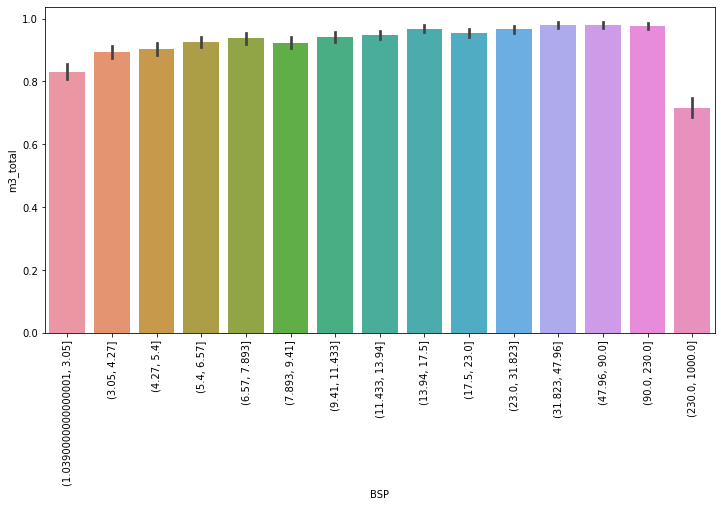

In [95]:
test_df['m3_total'] = np.where(test_df['m3'] > 0, 1, 0)
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
vals = pd.qcut(test_df['BSP'], 15)
sns.barplot(vals, test_df['m3_total'])

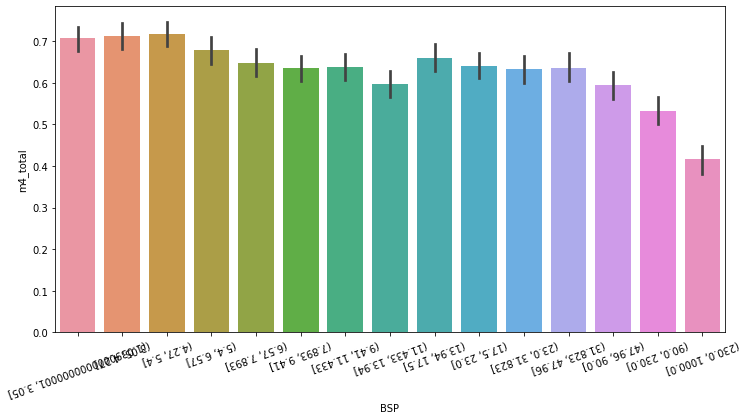

In [96]:
test_df['m4_total'] = np.where(test_df['m4'] > 0, 1, 0)
plt.figure(figsize=(12,6))
plt.xticks(rotation=200)
# sns.distplot(test_df['BSP'], test_df['m3_total'])
vals = pd.qcut(test_df['BSP'], 15)
sns.barplot(vals, test_df['m4_total'])

In [97]:
# for those that dont pass m3 do they pass m4
print(len(test_df.loc[(test_df['m3'] == 0)].index)) # 1062 dont pass lay threshold... do these meet l2b threshold?
print(len(test_df.loc[(test_df['m3'] == 0) & (test_df['m4'] > 0)].index))

1062
824


In [98]:
# for those dont pass m4 do they pass m3?
print(len(test_df.loc[(test_df['m4'] == 0)].index)) # 1062 dont pass lay threshold... do these meet l2b threshold?
print(len(test_df.loc[(test_df['m4'] == 0) & (test_df['m3'] > 0)].index))

4871
4633


*surpassing the BSP at at least one inplay standardised time interval (15 maximum). 

Insights : 
- Graph 1 shows much more opportunity for L2B strategy inplay at higher prices and happens less often at lower prices.
Could this be attributed to these horses more likely to lose so increase in price? 

- Graph 2 shows much more opportunity for B2L strategy inplay at lowers prices, up to 85% for example. 
Could be attributed to lower prices runners being more likely to win hence decrease in price more often

__However__ the amount of price movement should also be considered e.g. 950/1 can't go above 1000/1 and not be 'hedgeable' enough to make a profit. Same with very low prices runners? (I think this makes sense and  implied probabilites could help understand this better?). Therefore results taken with a grain of salt.

Therefore also include a metric with increases above a certain threshold e.g. min hedge * 10%

In [99]:
# input analysis on inplay variation by prices?46

---
---
---

### Strategy
Combining B2L with L2B

### B2L

In [144]:
STAKE = 10
T1 = -1
MULTIPLIER = 1.5#% 

test_df = df[back_prices + lay_prices + ['BSP']].copy().reset_index()

bp_start = test_df.columns.get_loc("BP:T+0")
bp_end = test_df.columns.get_loc("BP:T+14") + 1

lp_start = test_df.columns.get_loc("LP:T+0")
lp_end = test_df.columns.get_loc("LP:T+14") + 1

In [145]:
# bet 1
test_df['stake_1'] = round(((1 / test_df['BSP']) * STAKE), 2) # stake by imp_prob (to help reduced unmatched) - more profitable by 10% roi this way!
test_df['price_1'] = test_df['BP:T' + str(T1)]

# bet 2
test_df['lay_threshold'] = test_df['price_1'].apply(lambda x: utils.lay_hedge_threshold(x, 0.05))
test_df['price_2'] = round(test_df['price_1'] - (abs(test_df['price_1'] - test_df['lay_threshold']) * MULTIPLIER), 2)
test_df['n_matches'] = test_df.iloc[:,lp_start:lp_end].lt(test_df['price_2'],axis=0).sum(axis=1)
test_df['stake_2'] = round(test_df.apply(lambda x: utils.lay_hedge_stake(x['price_1'], x['stake_1'], x['price_2'], 0),
                                   axis=1), 2)
test_df['stake_2'] = np.where(test_df['n_matches'] == 0, 0, test_df['stake_2'])

# payouts
test_df['win_payout'] = test_df.apply(utils.win_payout, axis = 1)
test_df['lose_payout'] = test_df.apply(utils.lose_payout, axis = 1)
test_df['avg_payout'] = round(test_df[['win_payout', 'lose_payout']].mean(axis=1), 2)

Total runners       :  13071 
Total matches       :  5706 
% of matches        :  43.65 

Sum winning payout  :  1243.96 
Mean winning payout :  0.18 

Sum losing payout   :  -5568.38 
Mean losing payout  :  -0.9 

Total staked (£)    :  15161.37 
Total p/l (£)       :  -4324.42 
'ROI (%)            :  -28.52


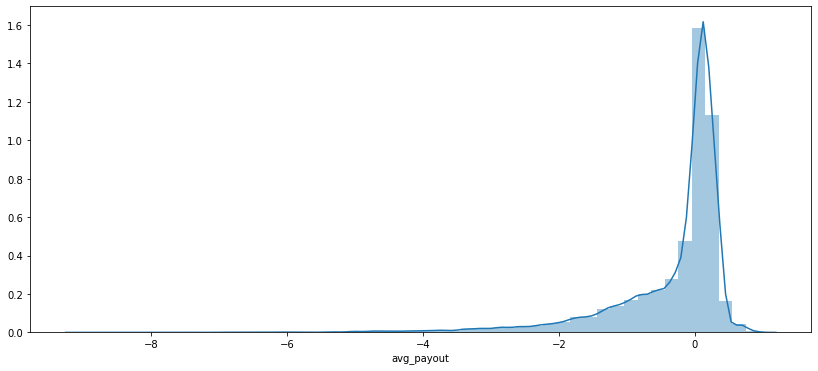

In [146]:
msk = test_df['price_1'] > 0
n_runners = len(test_df.loc[msk].index)
n_matches = len(test_df.loc[msk].loc[test_df['stake_2'] == 0].index)
n_matches_p = round((n_matches / n_runners) * 100,2)
sum_pos_payout = round(test_df.loc[msk].loc[test_df['avg_payout'] > 0]['avg_payout'].sum(), 2)
mean_pos_payout = round(test_df.loc[msk].loc[test_df['avg_payout'] > 0]['avg_payout'].mean(), 2)
sum_neg_payout = round(test_df.loc[msk].loc[test_df['avg_payout'] < 0]['avg_payout'].sum(), 2)
mean_neg_payout = round(test_df.loc[msk].loc[test_df['avg_payout'] < 0]['avg_payout'].mean(), 2)
total_payout = round(test_df.loc[msk]['avg_payout'].sum(), 2)
total_staked = round(test_df.loc[msk]['stake_1'].sum(), 2)

print("Total runners       : ", n_runners,
      "\nTotal matches       : ", n_matches,
      "\n% of matches        : ", n_matches_p,
      "\n\nSum winning payout  : ", sum_pos_payout,
      "\nMean winning payout : ", mean_pos_payout,
      "\n\nSum losing payout   : ", sum_neg_payout,      
      "\nMean losing payout  : ", mean_neg_payout,
      "\n\nTotal staked (£)    : ", total_staked,
      "\nTotal p/l (£)       : ", total_payout,
      "\n'ROI (%)            : ", round(((total_payout / total_staked) * 100), 2))

plt.figure(figsize = (14,6))
sns.distplot(test_df.loc[msk].loc[test_df['avg_payout'].notna()]['avg_payout'])

In [115]:
print dataframe alongisde graph for each band?
also apply  corresponding price changes...

SyntaxError: invalid syntax (<ipython-input-115-ed81bad564e7>, line 2)

In [ ]:
- vary 2nd bet price by bsp
- vary 1st bet stake by bsp (& likelihood to get matched)

### L2B

In [ ]:
# iterate along time points?
# price ranges
# distance (e.g. more likely to find match?)

In [ ]:
# double check that t doesnt matter to include commission in hedge function...
# dont think it matters but even hedge threshold then doesn't change???

In [ ]:
# hedge function tries to balance payour no matter the results, however difficult can only come close due to 
# rounding errors (wouldnt work perfetc in prac anway due to only tick prices available anyway)

In [ ]:
# double check hedge calcs
# assumes all stake of second bet is matched (as price points is passed)

In [ ]:
# currently based on size of first price that is matched at, should use sizes from later matches also if there?
# assumes first bet is matched. 

In [ ]:
change names to reflect orders and matches e.g. order_p1, order_s1
some rounding errors in funvtions...
l2b may be more profitable

In [ ]:
# move win/lose to utils

In [ ]:
# assumptions over volume behind price as these uses avg (same  as price,
# not specific e.g. could be one big order) - way to make this more granular?

In [ ]:
#To do
# when tweaking results e.g. as % increases, less likely to find a match/be profitable 
# ...- where is a good cutoff -plot!

# triple check hedge functions works correctly

# find an interesting inplay price pattern watch races for undestanding

# format notebook

# think about how to know what the BSP will be... model needed! build into strat too?
# may just be as easy (or predictable enough) as X% above T-60 price point?, liekly differs by BSP 
#... e.g. can't exceed 1000

In [ ]:
# double check lay payout is equal to volume avilable

In [ ]:
Features/Models
- specialisation - what is our biggest advantage over others? ML - specific market finding?


In [ ]:
# Finds first price in row below desired price - applies same logic to sizes.

temp_df = pd.DataFrame(np.where(test_df.iloc[:,lp_start:lp_end].lt(test_df['price_2'],axis=0),
                      test_df['price_2'],
                      np.nan))

test_df['price2_match'] = temp_df.bfill(axis=1).iloc[:, 0].fillna(0)

test_df.head()

ls_start = test_df.columns.get_loc("LS:T+0")
ls_end = test_df.columns.get_loc("LS:T+14") + 1

temp_df = pd.DataFrame(np.where(test_df.iloc[:,lp_start:lp_end].lt(test_df['price_2'],axis=0),
                      test_df.iloc[:,ls_start:ls_end],
                      np.nan))

test_df['size2_available'] = temp_df.bfill(axis=1).iloc[:, 0].fillna(0)

test_df.head()

test_df['stake2_match'] = np.where(test_df['stake_2'] <= test_df['size2_available'],
                                     test_df['stake_2'],
                                     test_df['size2_available'])

## also unused - assuming all of first bet matched
test_df['matched_1'] = np.where(test_df['BS:T' + str(T1)] > test_df['stake_1'],
                              test_df['stake_1'],
                              test_df['BS:T' + str(T1)])